In [1]:
import pandas as pd
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [2]:
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))
sys.path.append(os.path.abspath('../scripts'))

In [3]:
from scripts.data_loader import load_data, load_excel_data
from scripts.db_utils import fetch_data_from_db
from scripts.sql_query import get_user_data_query
from scripts.data_visualization import plot_throughput_distribution_by_handset, plot_retransmission_distribution_by_handset
from scripts.analysis import missing_values_table, convert_columns_to_mb,apply_ms_to_sec_and_drop, ExperienceAnalyzer, Experiencevisualizer, standardize_features, apply_kmeans, analyze_clusters, map_clusters, plot_clusters

In [4]:
# Define your query
query = "SELECT * FROM xdr_data;"  # Replace with the table or query you want

# Fetch data
data_tel = fetch_data_from_db(query)

# Display the data
if data_tel is not None:
    print(data_tel.head())
else:
    print("Failed to fetch data.")

c:\Users\fikad\Desktop\DESKTOP\10acedamy\Week_2\scripts\db_utils.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, connection)


      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

In [5]:
data_tel

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [6]:
missing_values_df = missing_values_table(data_tel)
print("Missing Values in df:")
print(missing_values_df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.
Missing Values in df:
                                          Missing Values  % of Total Values  \
Nb of sec with 37500B < Vol UL                    130254               86.8   
Nb of sec with 6250B < Vol UL < 37500B            111843               74.6   
Nb of sec with 125000B < Vol DL                    97538               65.0   
TCP UL Retrans. Vol (Bytes)                        96649               64.4   
Nb of sec with 31250B < Vol DL < 125000B           93586               62.4   
Nb of sec with 1250B < Vol UL < 6250B              92894               61.9   
Nb of sec with 6250B < Vol DL < 31250B             88317               58.9   
TCP DL Retrans. Vol (Bytes)                        88146               58.8   
HTTP UL (Bytes)                                    81810               54.5   
HTTP DL (Bytes)                                    81474               54.3   
Avg RTT DL (ms)       

## data aggregation and TCP value analysis

In [7]:
Aggregation = ExperienceAnalyzer(data_tel)
Aggregation.aggregate_user_data()
print(Aggregation.user_agg.head())


   MSISDN/Number  TCP DL Retrans. Vol (Bytes)  Avg RTT DL (ms)  \
0   3.360100e+10                 2.080991e+07        46.000000   
1   3.360100e+10                 2.080991e+07        30.000000   
2   3.360100e+10                 2.080991e+07       109.795706   
3   3.360101e+10                 1.066000e+03        69.000000   
4   3.360101e+10                 1.507977e+07        57.000000   

                     Handset Type  Avg Bearer TP DL (kbps)  
0  Huawei P20 Lite Huawei Nova 3E                     37.0  
1          Apple iPhone 7 (A1778)                     48.0  
2                       undefined                     48.0  
3         Apple iPhone 5S (A1457)                    204.0  
4         Apple iPhone Se (A1723)                  20197.5  


In [8]:

# Step 2: Analyze columns for top, bottom, and most frequent values
columns_to_analyze = [
    'TCP DL Retrans. Vol (Bytes)',
    'Avg RTT DL (ms)',
    'Avg Bearer TP DL (kbps)'
]

results = Aggregation.analyze_columns(columns_to_analyze, top_n=10)

# Display the results
for metric, values in results.items():
    print(f"Metric: {metric}")
    print("Top 10 Values:\n", values['Top 10'])
    print("Bottom 10 Values:\n", values['Bottom 10'])
    print("Most Frequent 10 Values:\n", values['Most Frequent 10'])
    print("\n" + "-"*50 + "\n")


Metric: TCP DL Retrans. Vol (Bytes)
Top 10 Values:
 85785    4.289488e+09
32273    4.288060e+09
58026    4.268432e+09
31942    4.254644e+09
62049    4.211189e+09
70079    4.166591e+09
43629    4.131046e+09
48341    4.117753e+09
64113    3.968072e+09
98211    3.785295e+09
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Bottom 10 Values:
 56622     2.0
95322     2.0
71705     4.0
71778     4.0
87156     4.0
87348     4.0
95213     4.0
95331     4.0
95774     4.0
100616    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Most Frequent 10 Values:
 TCP DL Retrans. Vol (Bytes)
2.080991e+07    58332
1.330000e+03      247
2.660000e+03      138
9.200000e+01      112
1.040562e+07      103
3.800000e+01       99
1.318000e+03       79
3.990000e+03       72
1.040498e+07       68
5.320000e+03       64
Name: count, dtype: int64

--------------------------------------------------

Metric: Avg RTT DL (ms)
Top 10 Values:
 47983     96923.0
80249     54847.0
41944     32333.0
93844     26971.0
1713

## Distribution of Average Throughput and Average TCP Retransmission per Handset Type



Average Throughput per Handset Type:
Handset Type
A-Link Telecom I. Cubot A5                                                             23184.000000
A-Link Telecom I. Cubot Note Plus                                                       6527.000000
A-Link Telecom I. Cubot Note S                                                          8515.000000
A-Link Telecom I. Cubot Nova                                                           55667.000000
A-Link Telecom I. Cubot Power                                                          69126.000000
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809       44.500000
Zyxel Communicat. Lte7460                                                              39741.000000
Zyxel Communicat. Sbg3600                                                              82818.000000
Zyxel Communicat. Zyxel Wah7706                  

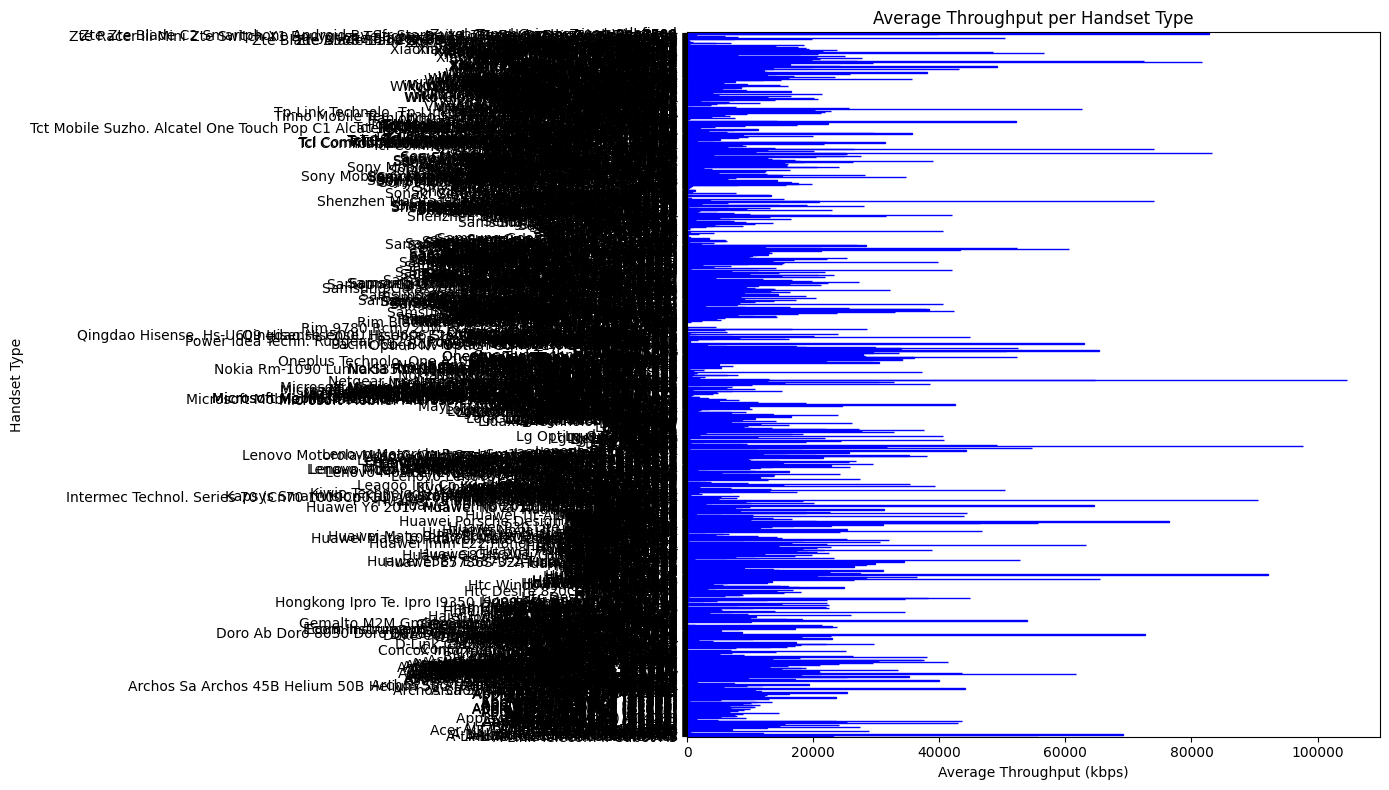


Average TCP Retransmission per Handset Type:
Handset Type
A-Link Telecom I. Cubot A5                                                                      NaN
A-Link Telecom I. Cubot Note Plus                                                      6.023490e+05
A-Link Telecom I. Cubot Note S                                                         4.134448e+07
A-Link Telecom I. Cubot Nova                                                           1.358400e+05
A-Link Telecom I. Cubot Power                                                          7.799000e+03
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809    2.660000e+03
Zyxel Communicat. Lte7460                                                              2.384303e+07
Zyxel Communicat. Sbg3600                                                              5.020084e+07
Zyxel Communicat. Zyxel Wah7706          

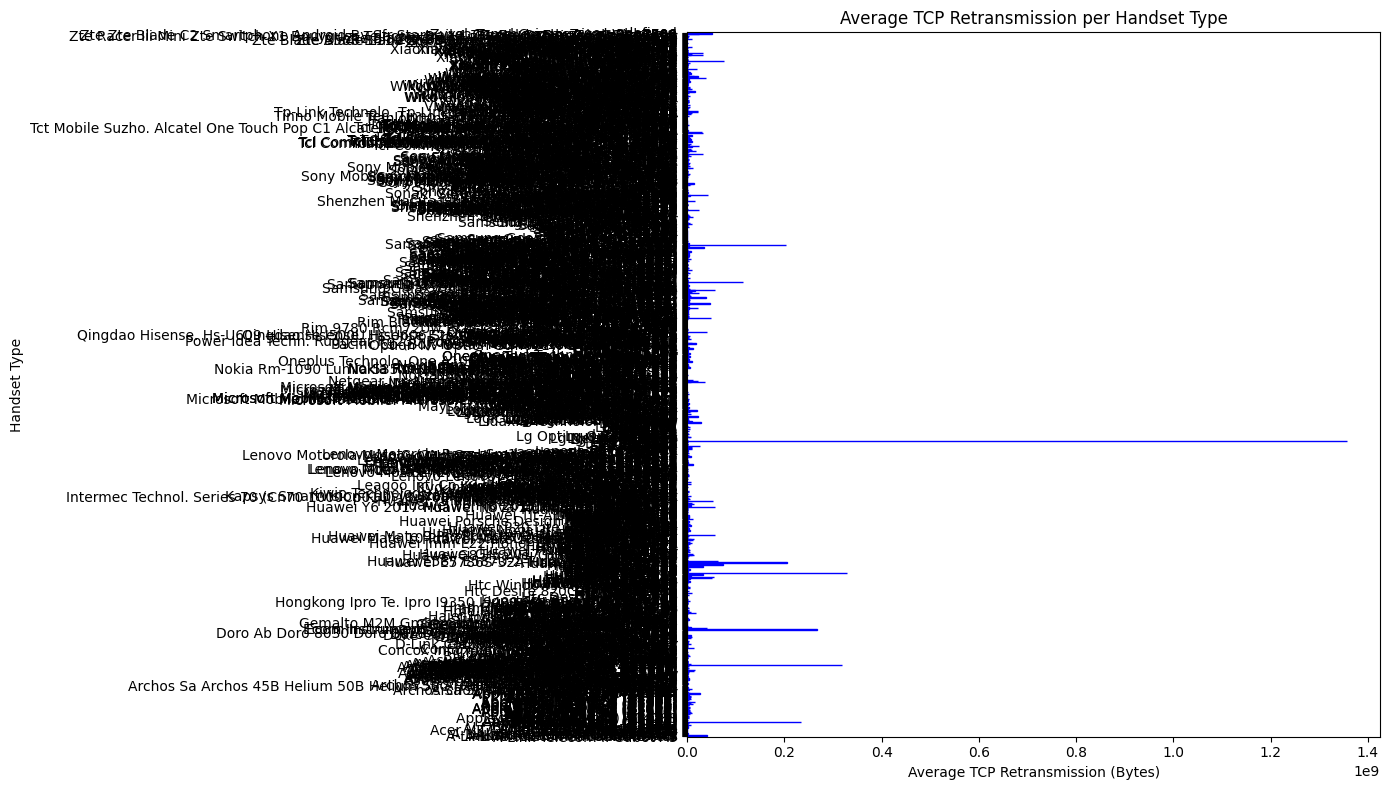

In [9]:
Visualizer = Experiencevisualizer(data_tel)

Visualizer.plot_throughput_distribution_by_handset()  # To analyze throughput
Visualizer.plot_retransmission_distribution_by_handset()  # To analyze retransmissions

In [ ]:
# Plot histogram for average throughput per handset type
plt.figure(figsize=(12, 6))

for i, handset_type in enumerate(aggregated_data['most_frequent_handset_type'].unique()):
    subset = aggregated_data[aggregated_data['most_frequent_handset_type'] == handset_type]
    sns.histplot(subset['average_throughput'], kde=True, label=handset_type, bins=20, alpha=0.6)
    if i == 5: break


plt.title('Histogram of Average Throughput per Handset Type')
plt.xlabel('Average Throughput (kbps)')
plt.ylabel('Frequency')
plt.legend(title='Handset Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [10]:
# Example usage
columns_to_convert = ['Start ms', 'End ms', 'Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
                      'Activity Duration DL (ms)', 'Activity Duration UL (ms)']

apply_ms_to_sec_and_drop(columns_to_convert, data_tel)
# List of columns to convert from Bytes to MB
columns_to_convert = [
    'HTTP UL (Bytes)', 'Social Media UL (Bytes)', 'Google UL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 'Total UL (Bytes)', 'HTTP DL (Bytes)',
    'Social Media DL (Bytes)', 'Google DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)',
    'Gaming DL (Bytes)', 'Total DL (Bytes)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)'
]

# Apply the function to convert all columns
convert_columns_to_mb(columns_to_convert, data_tel)

,Bearer Id,Start,End,IMSI,MSISDN/Number,IMEI,Last Location Name,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),...,Youtube DL (MB),Netflix DL (MB),Gaming DL (MB),Total DL (MB),TCP DL Retrans. Vol (MB),TCP UL Retrans. Vol (MB),Other DL (MB),Other UL (MB),Email DL (MB),Email UL (MB)
0,1.311448e+19,4/4/2019 12:01,4/25/2019 14:35,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,23.0,44.0,100.0,...,15.854611,8.198936,278.082303,308.879636,NaN,NaN,171.744450,8.814393,3.563542,0.137762
1,1.311448e+19,4/9/2019 13:04,4/25/2019 8:15,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,16.0,26.0,100.0,...,20.247395,18.338413,608.750074,653.384965,NaN,NaN,526.904238,15.055145,0.629046,0.308339
2,1.311448e+19,4/9/2019 17:42,4/25/2019 11:58,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,6.0,9.0,100.0,...,19.725661,17.587794,229.584621,279.807335,NaN,NaN,410.692588,4.215763,2.690151,0.672973
3,1.311448e+19,4/10/2019 0:31,4/25/2019 7:36,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,44.0,44.0,100.0,...,21.388122,13.994646,799.538153,846.028530,NaN,NaN,749.039933,12.797283,1.439754,0.631229
4,1.311448e+19,4/12/2019 20:10,4/25/2019 10:40,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,6.0,9.0,100.0,...,15.259380,17.124581,527.707248,569.138589,NaN,NaN,550.709500,13.910322,1.936496,0.173853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,4/30/2019 6:02,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,52.0,65.0,100.0,...,16.191667,17.883703,526.609673,574.175259,NaN,NaN,3.264510,13.487416,0.057639,0.633237
149997,7.349883e+18,4/29/2019 7:28,4/30/2019 10:41,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,23.0,54.0,100.0,...,13.877234,19.350146,626.893062,666.648844,NaN,NaN,712.180387,2.457758,1.954414,0.167304
149998,1.311448e+19,4/29/2019 7:28,4/30/2019 10:46,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,43.0,47.0,100.0,...,22.660510,9.963942,553.539484,592.786405,NaN,NaN,121.100856,11.314729,1.525734,0.532543
149999,1.311448e+19,4/29/2019 7:28,4/30/2019 10:40,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,34.0,37.0,100.0,...,8.817106,3.322253,352.536971,371.895920,NaN,NaN,814.713113,1.406930,2.228270,0.622644


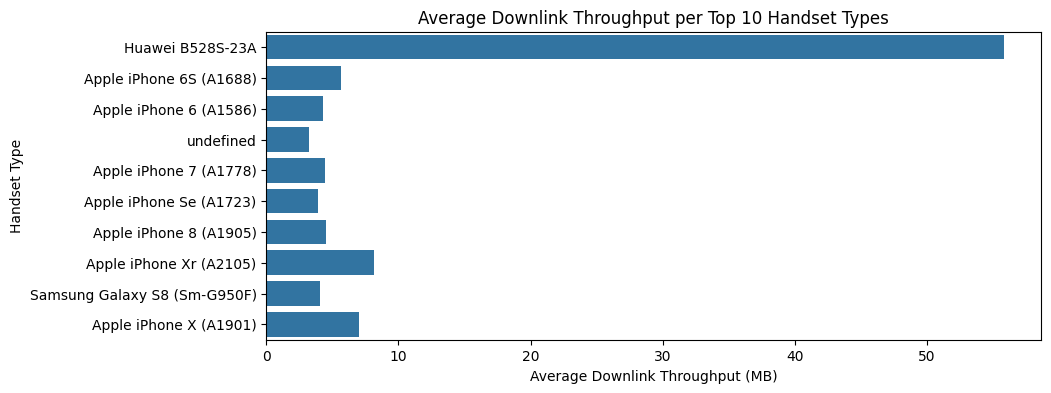

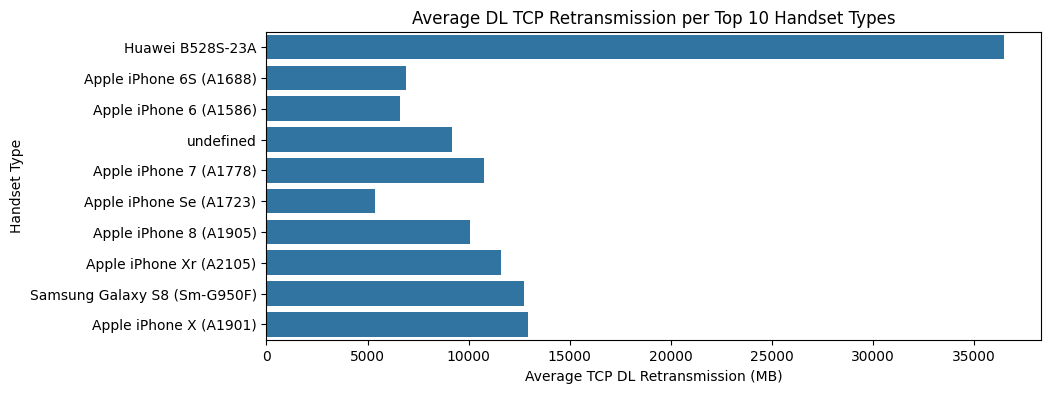

                      Handset Type  Count  Avg Downlink Throughput (MB)  \
316               Huawei B528S-23A  19752                     55.884794   
53         Apple iPhone 6S (A1688)   9419                      5.660662   
49          Apple iPhone 6 (A1586)   9023                      4.308856   
1395                     undefined   8987                      3.250526   
59          Apple iPhone 7 (A1778)   6326                      4.453711   
73         Apple iPhone Se (A1723)   5187                      3.921699   
66          Apple iPhone 8 (A1905)   4993                      4.489946   
78         Apple iPhone Xr (A2105)   4568                      8.128417   
955   Samsung Galaxy S8 (Sm-G950F)   4520                      4.061880   
75          Apple iPhone X (A1901)   3813                      6.978602   

      Avg DL TCP Retransmission (MB)  
316                     36493.835156  
53                       6918.948933  
49                       6581.845949  
1395              

In [11]:
# Group by handset type and compute the count, average throughput, and TCP retransmission
handset_grouped = data_tel.groupby('Handset Type').agg({
    'TCP DL Retrans. Vol (MB)': 'mean',
    'TCP UL Retrans. Vol (MB)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    'Handset Type': 'count'  # Counting the occurrences of each handset type
}).rename(columns={'Handset Type': 'Count'}).reset_index()

# Rename columns for clarity
handset_grouped.columns = [
    'Handset Type',
    'Avg Downlink Throughput (MB)',
    'Avg Uplink Throughput (MB)',
    'Avg DL TCP Retransmission (MB)',
    'Avg UL TCP Retransmission (MB)',
    'Count'  # Adding count for each handset type
]

# Sort values by count for top 10 handsets
handset_grouped_sorted = handset_grouped.sort_values(by='Count', ascending=False).head(10)

# Plot Average Throughput per Handset Type for Top 10 Handsets
plt.figure(figsize=(10, 4))
sns.barplot(data=handset_grouped_sorted, x='Avg Downlink Throughput (MB)', y='Handset Type')
plt.title('Average Downlink Throughput per Top 10 Handset Types')
plt.xlabel('Average Downlink Throughput (MB)')
plt.ylabel('Handset Type')
plt.show()

# Plot Average TCP Retransmission per Handset Type for Top 10 Handsets
plt.figure(figsize=(10, 4))
sns.barplot(data=handset_grouped_sorted, x='Avg DL TCP Retransmission (MB)', y='Handset Type')
plt.title('Average DL TCP Retransmission per Top 10 Handset Types')
plt.xlabel('Average TCP DL Retransmission (MB)')
plt.ylabel('Handset Type')
plt.show()

# Print the summary of the top 10 handsets based on count
print(handset_grouped_sorted[['Handset Type', 'Count', 'Avg Downlink Throughput (MB)', 'Avg DL TCP Retransmission (MB)']])

## K-Means Clustering of Users Based on Experience Metrics

Cluster centers summary:
   Avg Bearer TP UL (kbps)  Avg Bearer TP DL (kbps)  TCP DL Retrans. Vol (MB)  \
0               455.275195              5216.112292                  1.938380   
1              8847.279407             56692.280953                 19.373530   
2              8161.090909             62911.586777               2649.013455   

   TCP UL Retrans. Vol (MB)  Avg RTT UL (sec)  Avg RTT DL (sec)  
0                  0.070694          0.009718          0.100868  
1                  1.428872          0.045472          0.080819  
2                  1.412497          0.038628          0.112240  
   Cluster         ClusterNo
0        0  High Performance
1        0  High Performance
2        0  High Performance
3        0  High Performance
4        0  High Performance


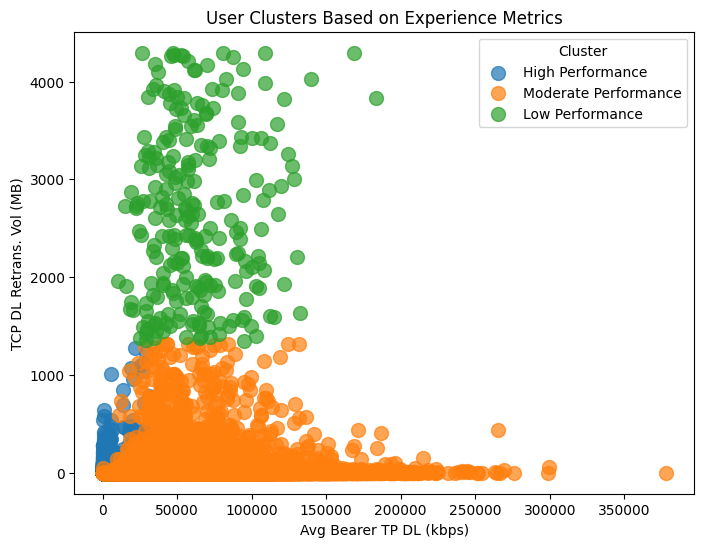

In [12]:
# Define relevant features
features = ['Avg Bearer TP UL (kbps)', 'Avg Bearer TP DL (kbps)', 'TCP DL Retrans. Vol (MB)',
            'TCP UL Retrans. Vol (MB)', 'Avg RTT UL (sec)', 'Avg RTT DL (sec)']

data_tel[features] = data_tel[features].fillna(data_tel[features].median())

# Standardize features
transformed_data, scaler = standardize_features(data_tel, features)

# Apply K-means clustering
data_tel, kmeans = apply_kmeans(data_tel, transformed_data)

# Analyze cluster centers
cluster_summary = analyze_clusters(kmeans, scaler, features)
print("Cluster centers summary:")
print(cluster_summary)

# Map cluster numbers to descriptive names
cluster_mapping = {0: "High Performance", 1: "Moderate Performance", 2: "Low Performance"}
data_tel = map_clusters(data_tel, cluster_mapping)
print(data_tel[['Cluster', 'ClusterNo']].head())

# Plot clusters
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
plot_clusters(data_tel, 'Avg Bearer TP DL (kbps)', 'TCP DL Retrans. Vol (MB)', cluster_mapping, colors)

In [13]:
# Step 1: Add a column for total data volume (DL + UL) per application for each session
applications = ['Social Media', 'Youtube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']
for app in applications:
    data_tel[f'{app} Total'] = data_tel[f'{app} DL (MB)'] + data_tel[f'{app} UL (MB)']

# Step 2: Aggregate the data per user (IMSI)
user_behavior = data_tel.groupby('IMSI').agg(
    number_of_xdr_sessions=('Bearer Id', 'count'),               # Assuming 'Bearer Id' is session identifier
    total_session_duration=('Dur. (sec)', 'sum'),                # Sum of session durations
    total_social_media_data=('Social Media Total', 'sum'),       # Total data volume for Social Media
    total_youtube_data=('Youtube Total', 'sum'),                 # Total data volume for YouTube
    total_netflix_data=('Netflix Total', 'sum'),                 # Total data volume for Netflix
    total_google_data=('Google Total', 'sum'),                   # Total data volume for Google
    total_email_data=('Email Total', 'sum'),                     # Total data volume for Email
    total_gaming_data=('Gaming Total', 'sum'),                   # Total data volume for Gaming
    total_other_data=('Other Total', 'sum')                      # Total data volume for Other
)

# Step 3: Calculate total download and upload data per user
# Download data
user_behavior['total_download_data'] = data_tel.groupby('IMSI')[[
    'Social Media DL (MB)', 'Youtube DL (MB)', 'Netflix DL (MB)',
    'Google DL (MB)', 'Email DL (MB)', 'Gaming DL (MB)', 'Other DL (MB)'
]].sum().sum(axis=1)

# Upload data
user_behavior['total_upload_data'] = data_tel.groupby('IMSI')[[
    'Social Media UL (MB)', 'Youtube UL (MB)', 'Netflix UL (MB)',
    'Google UL (MB)', 'Email UL (MB)', 'Gaming UL (MB)', 'Other UL (MB)'
]].sum().sum(axis=1)

# Step 4: Display the aggregated user behavior data
user_behavior.head()

,number_of_xdr_sessions,total_session_duration,total_social_media_data,total_youtube_data,total_netflix_data,total_google_data,total_email_data,total_gaming_data,total_other_data,total_download_data,total_upload_data
IMSI,,,,,,,,,,,
2.040471e+14,1,869.844,1.546088,40.940710,28.846230,9.218647,3.330974,43.070260,401.360457,467.857317,60.456049
2.040808e+14,1,877.385,0.715224,11.959905,26.592300,10.438660,1.520771,178.048738,470.526473,662.506156,37.295915
2.082001e+14,1,86.019,3.122781,19.882439,31.830562,1.624662,3.657501,9.124516,515.973704,531.421507,53.794658
2.082001e+14,1,86.254,2.577104,25.657632,27.785852,13.811478,3.855734,344.105897,309.610741,693.821166,33.583272
2.082001e+14,2,573.923,3.426716,13.840201,57.343415,11.665887,5.564462,917.684766,1079.435419,2017.635862,71.325004
